In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics
import time

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [3]:
train= pd.read_csv('/Users/Chengxin/Desktop/All/Project_Portfolio/Healthcare/Patient Analysis/Resources/train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [7]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [8]:
train.shape

(318438, 16)

In [9]:
train.duplicated().sum()

154

In [10]:
train = train.drop_duplicates()
train.shape

(318284, 16)

In [11]:
train.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318284.000000,318284.000000,318284.000000,318284.000000,318284.000000,318284.000000,318284.000000
mean,18.318850,4.771054,3.197798,2.625643,7.262517,3.283759,4880.785371
std,8.634225,3.102727,1.168240,0.873061,4.712888,1.763220,1086.819046
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1800.000000
25%,11.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4186.000000
50%,19.000000,5.000000,3.000000,3.000000,8.000000,3.000000,4741.000000
75%,26.000000,7.000000,4.000000,3.000000,8.000000,4.000000,5409.000000
max,32.000000,13.000000,24.000000,4.000000,38.000000,32.000000,11008.000000


In [12]:
cat_cols=[]
num_cols=[]

for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
        
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)

print(cat_cols)
print('------------------------------------------')
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
------------------------------------------
['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


## Exploratory Data Analysis

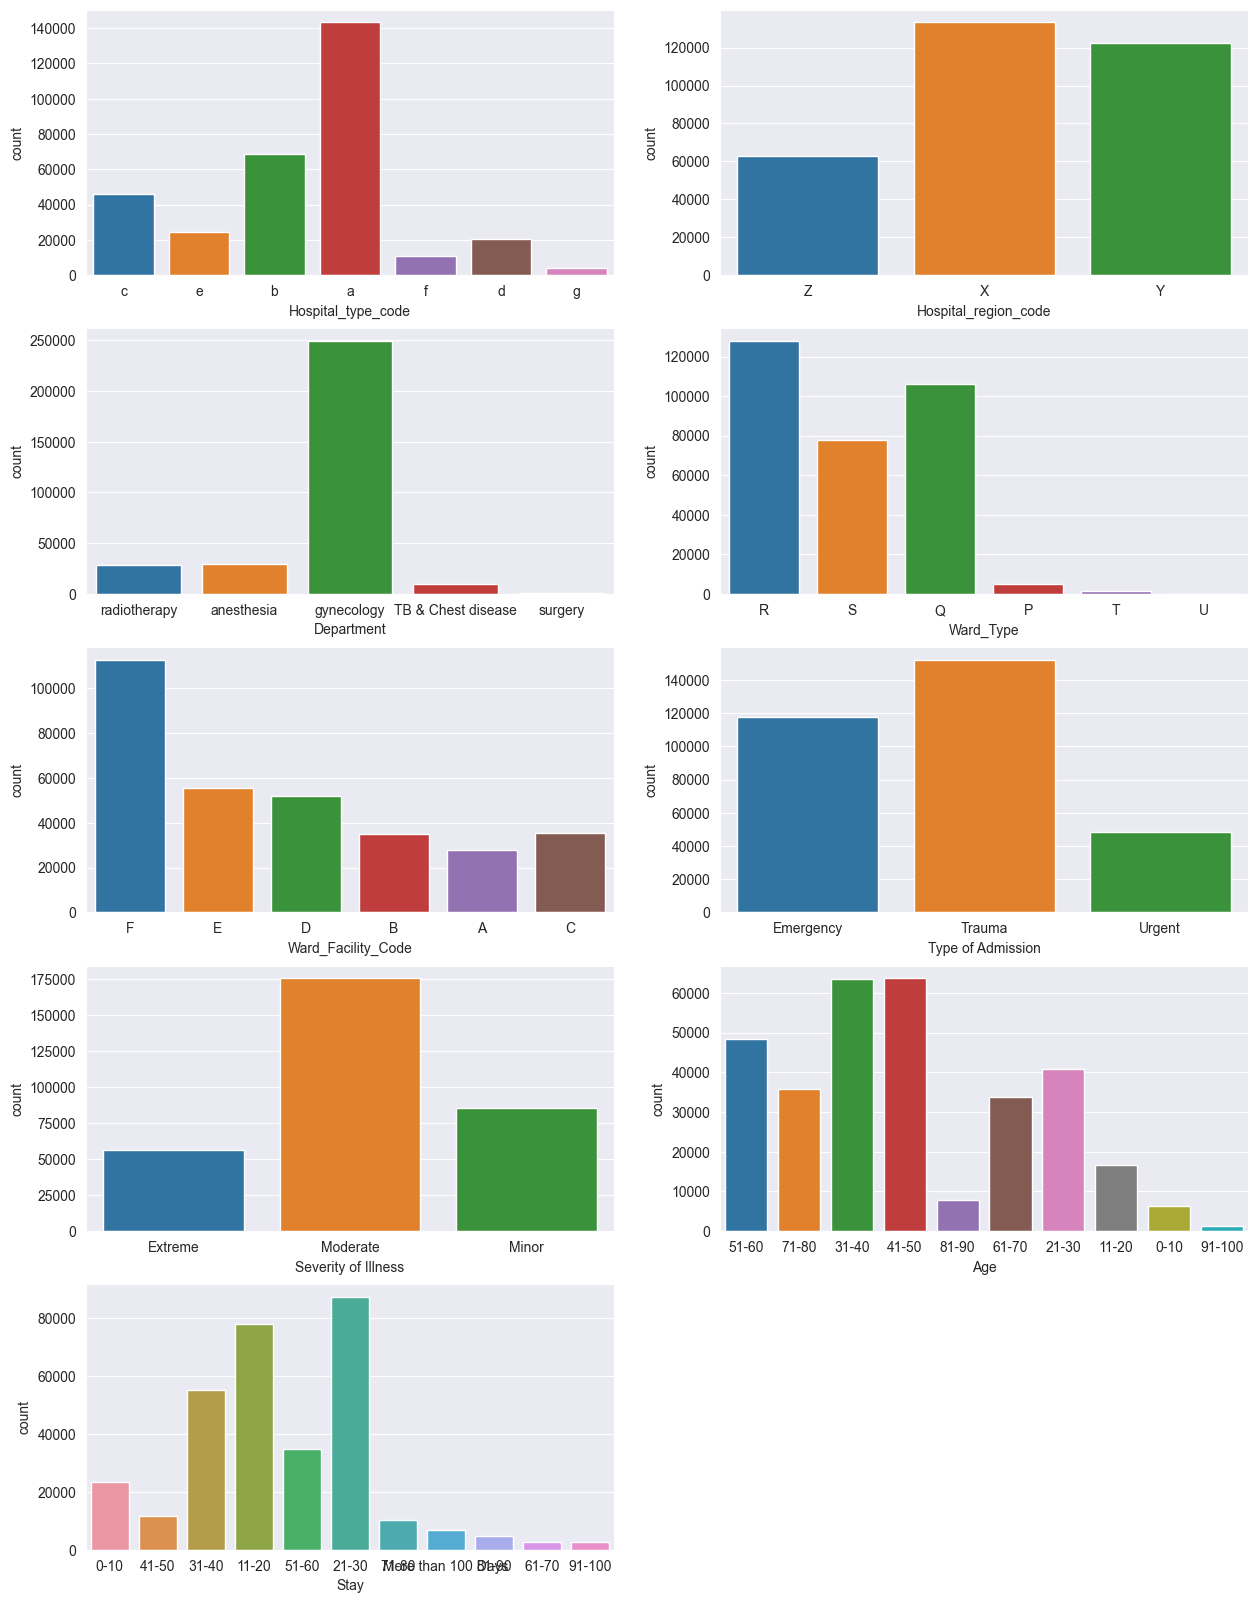

In [13]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

In [14]:
train['Stay'].value_counts()

21-30                 87456
11-20                 78101
31-40                 55140
51-60                 34997
0-10                  23591
41-50                 11743
71-80                 10246
More than 100 Days     6666
81-90                  4836
91-100                 2764
61-70                  2744
Name: Stay, dtype: int64

In [15]:
# Dividing stay duration into 3 categories: 0-20days, 21-60days, 61-100+days
train['Stay']= train['Stay'].replace({'0-10':0, '11-20':0, '21-30':1, '31-40':1, '41-50':1, '51-60':2,'61-70':2,'71-80':2,'81-90':2,'91-100':2,'More than 100 Days':2})

In [16]:
train['Stay'].value_counts()

1    154339
0    101692
2     62253
Name: Stay, dtype: int64

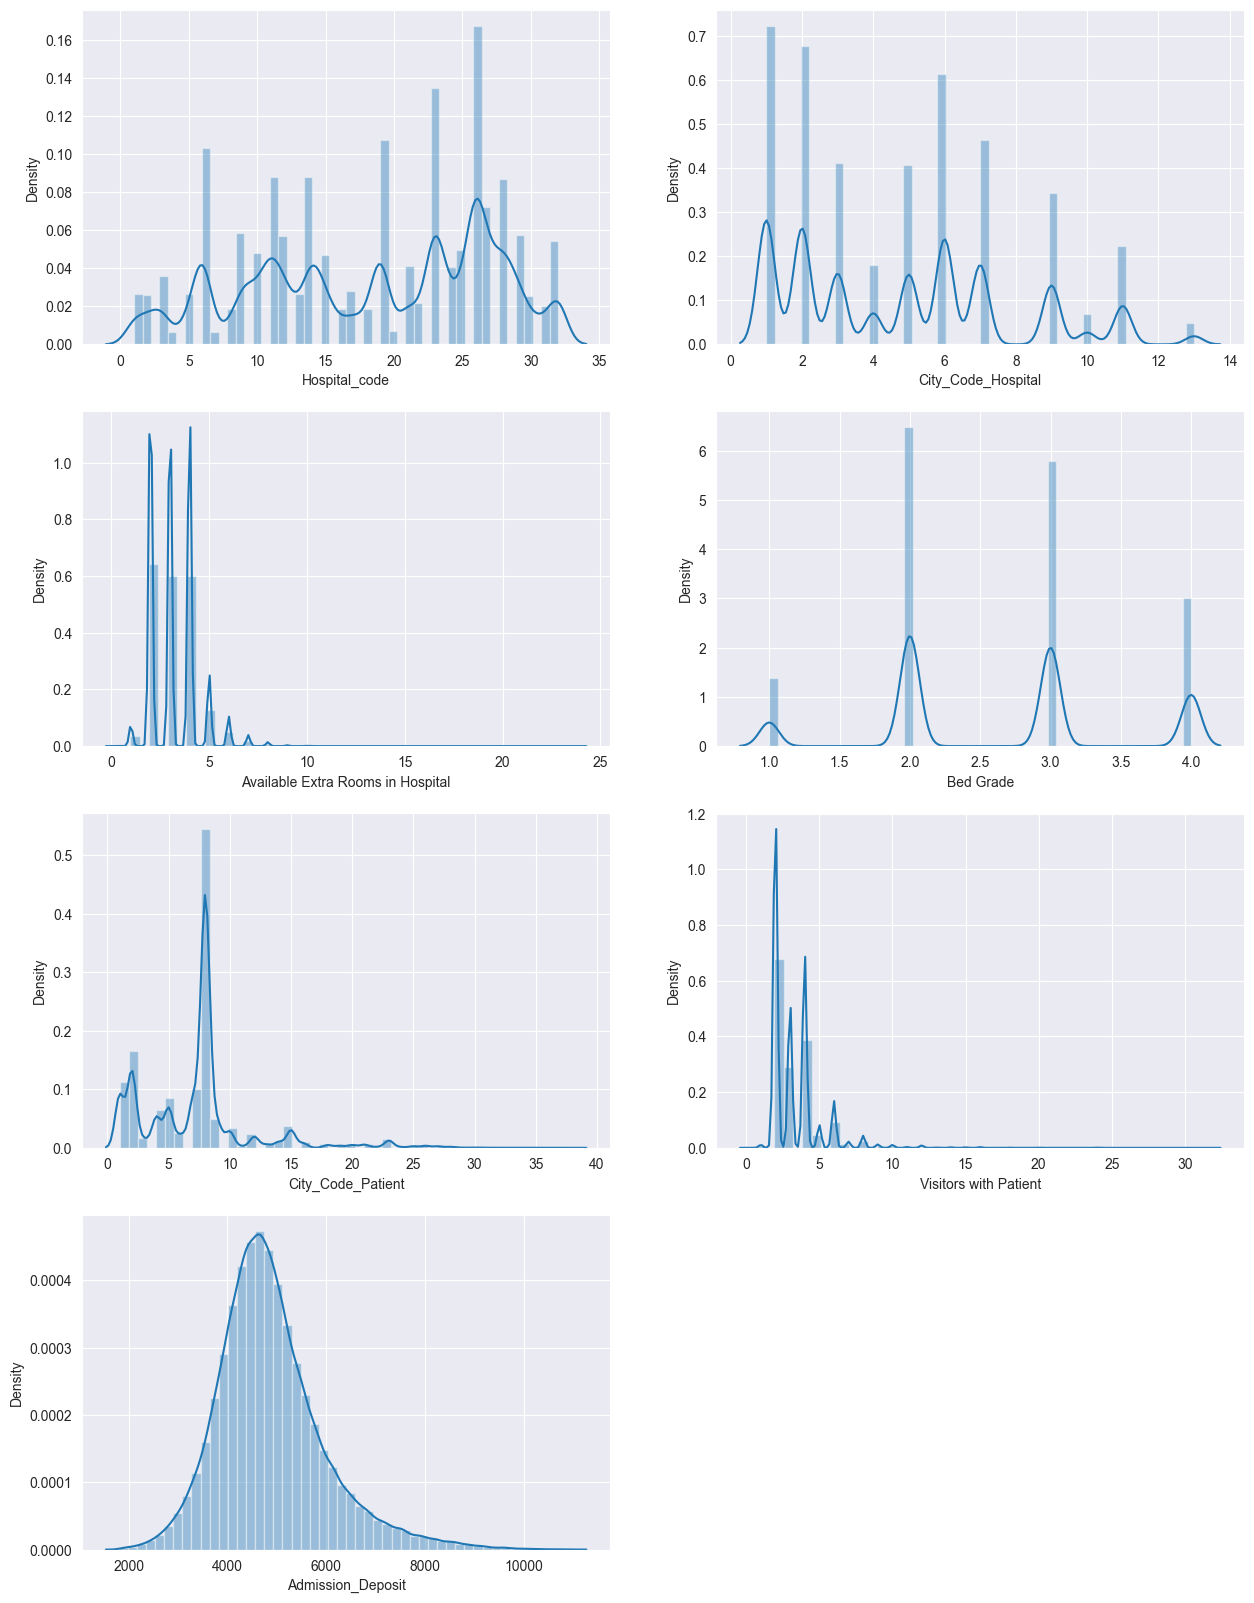

In [17]:
i=1
plt.figure(figsize=(15,20))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.distplot(train[col])
    i=i+1
    
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# Numeric columns switched categorical
cat_cols.append('Bed Grade')
cat_cols.append('City_Code_Hospital')
cat_cols.append('City_Code_Patient')

# Encode categoric columns
for col in cat_cols:
    train[col]= le.fit_transform(train[col])
    
train[cat_cols].head()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay,Bed Grade,City_Code_Hospital,City_Code_Patient
0,2,2,3,2,5,0,0,5,0,1,2,6
1,2,2,3,3,5,1,0,5,1,1,4,6
2,4,0,1,3,4,1,0,5,1,1,0,6
3,1,1,3,2,3,1,0,5,1,1,1,6
4,1,1,3,3,3,1,0,5,1,1,1,6


In [19]:
# train['City_Code_Hospital'].value_counts()

In [20]:
# train['City_Code_Patient'].value_counts()

In [21]:
num_cols.remove('Bed Grade')
num_cols.remove('City_Code_Hospital')
num_cols.remove('City_Code_Patient')
num_cols

['Hospital_code',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

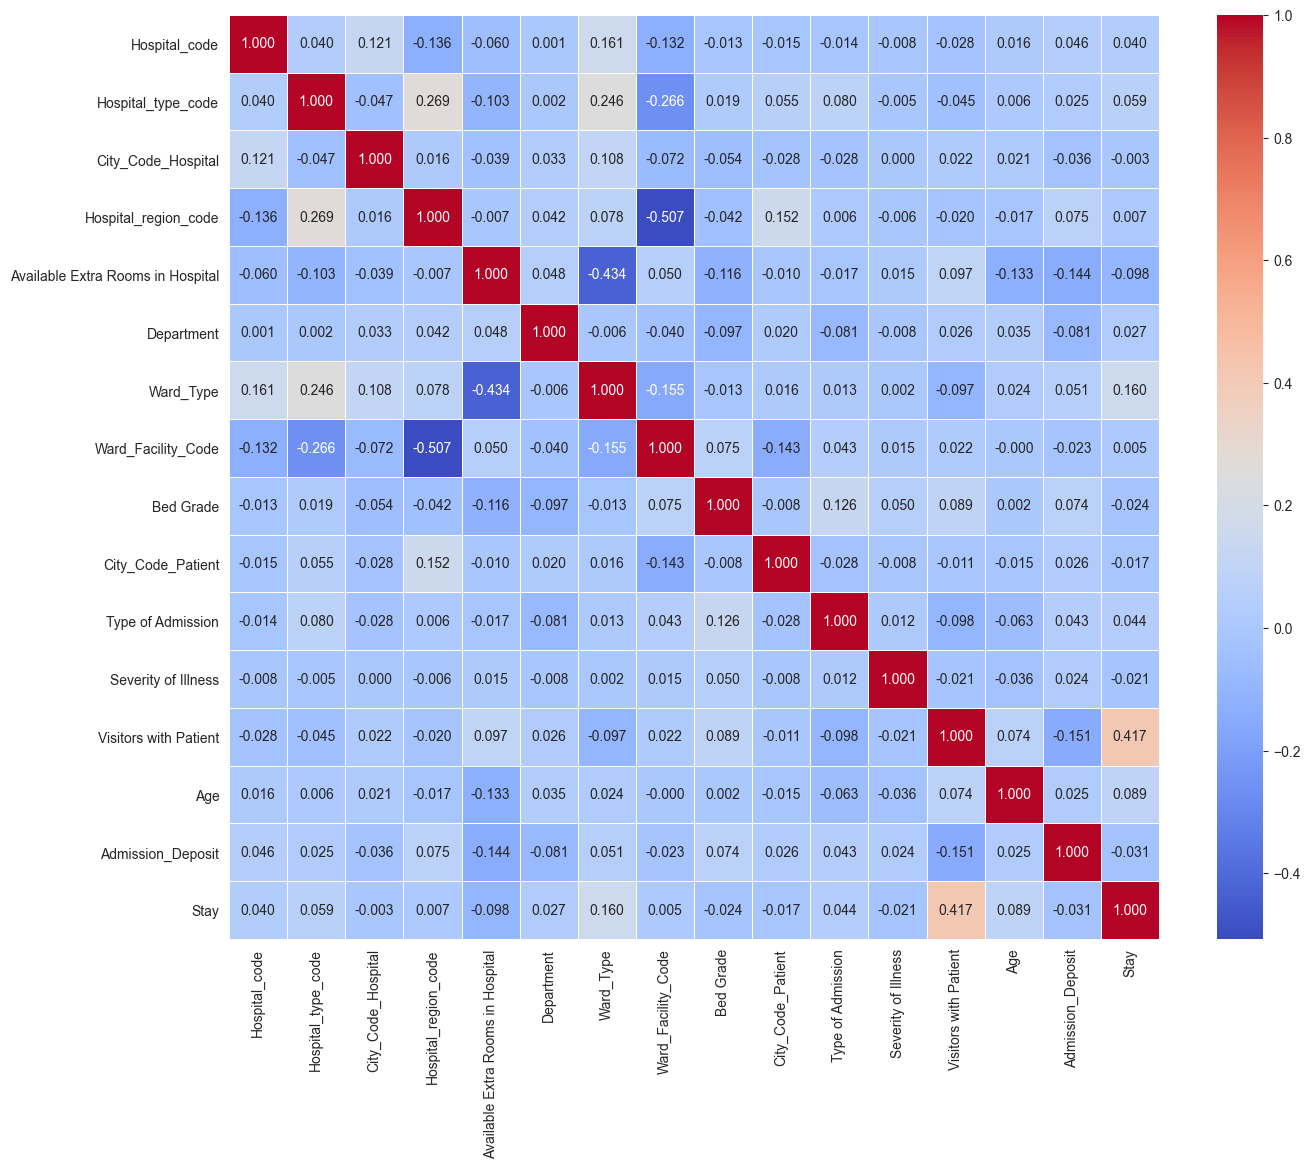

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt = '.3f', linewidths = 0.5)
plt.show()

In [23]:
# Scaling columns
from sklearn.preprocessing import StandardScaler

scale_df = StandardScaler()
train[num_cols]= scale_df.fit_transform(train[num_cols].values)

In [24]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.195112,2,2,2,-0.169313,3,2,5,1,6,0,0,-0.728078,5,0.027801,0
1,-1.890022,2,4,2,-1.025303,3,3,5,1,6,1,0,-0.728078,5,0.987484,1
2,-0.963475,4,0,0,-1.025303,1,3,4,1,6,1,0,-0.728078,5,-0.124939,1
3,0.889618,1,1,1,-1.025303,3,2,3,1,6,1,0,-0.728078,5,2.200199,1
4,0.889618,1,1,1,-1.025303,3,3,3,1,6,1,0,-0.728078,5,0.623117,1


In [25]:
from sklearn.model_selection import train_test_split

# traget variable
y = train['Stay']
X = train.drop('Stay', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y, random_state=42)

## Building Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# Train with various models
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), BaggingClassifier(), AdaBoostClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'BaggingClassifier', 'AdaBoostClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    start = time.time()
    value.fit(X_train,y_train)
    end = time.time()
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)
    print('runtime: ', end - start)
    print('---')

LogisticRegression
0.5647454325525865
runtime:  4.7694268226623535
---
RandomForsetClassifier
0.6016149048808458
runtime:  45.466689109802246
---
DecisionTreeClassifier
0.5206811505411817
runtime:  2.3296377658843994
---
KNeighborsClassifier
0.5550057338548785
runtime:  0.8203089237213135
---
BaggingClassifier
0.5733226510831487
runtime:  15.660537004470825
---
AdaBoostClassifier
0.579449235747836
runtime:  11.868215084075928
---
XGBClassifier
0.6293730461693137
runtime:  63.12866687774658
---


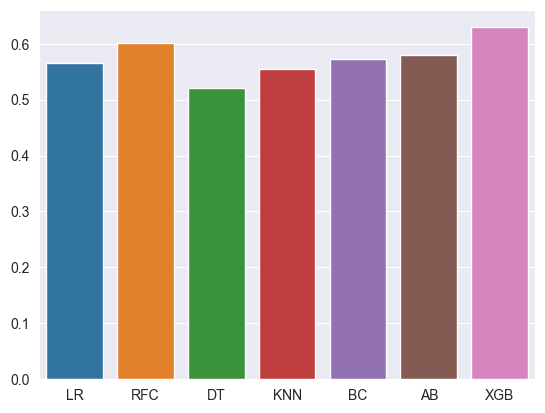

In [29]:
sns.barplot(x = ['LR','RFC','DT','KNN','BC','AB','XGB'], y = accuracy_scores)
plt.show()

In [38]:
start = time.time()

lr = LogisticRegression(random_state=20)
ab = AdaBoostClassifier(random_state=20)
bag = BaggingClassifier(random_state=20)

classifiers = [('Logistic Regression', lr),('Ada Boost', ab), ('Bagging', bag)]

vc = VotingClassifier(estimators=classifiers, voting='soft')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(random_state=20)),
                             ('Ada Boost', AdaBoostClassifier(random_state=20)),
                             ('Bagging', BaggingClassifier(random_state=20))],
                 voting='soft')

In [39]:
end = time.time()
print('runtime: ', end - start)

runtime:  37.74118137359619


In [40]:
vc.score(X_train, y_train)

0.9308439403519658

In [41]:
y_pred = vc.predict(X_test)

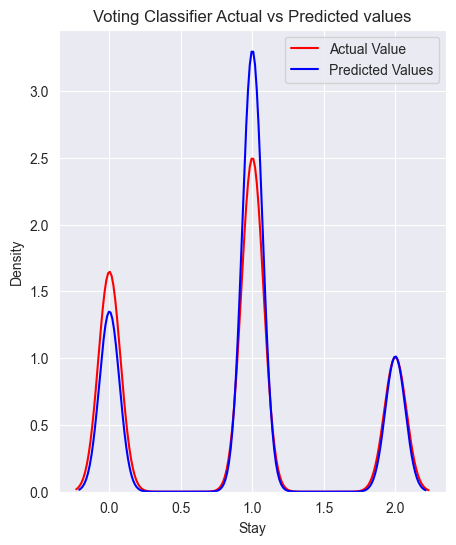

In [42]:
# Actual vs. Predicted Value.
plt.figure(figsize=(5, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)

plt.title('Voting Classifier Actual vs Predicted values')
plt.legend()
plt.show()

In [43]:
start = time.time()

rf = RandomForestClassifier(random_state=20)
ab = AdaBoostClassifier(random_state=20)
xgb = XGBClassifier(random_state=20)

classifiers = [('Random Forest', rf),('Ada Boost', ab), ('XGB Boost', xgb)]

vc2 = VotingClassifier(estimators=classifiers, voting='soft')
vc2.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=20)),
                             ('Ada Boost', AdaBoostClassifier(random_state=20)),
                             ('XGB Boost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=Non...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=20,
                                            reg_alpha=None, reg_lambda=None, ...))],
                 voting='soft')

In [44]:
end = time.time()
print('runtime: ', end - start)

runtime:  127.67314100265503


In [45]:
vc2.score(X_train, y_train)

0.9342921214168175